In [23]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [24]:
# read in the data
df = pd.read_feather("../preprocessed_data/cleaned_yellow_19_3IQR.feather").drop('index', axis=1)

df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount
0,2019-10-01 00:29:01,2019-10-01 00:34:58,1.00,7,7,6.0,0.00,7.30,5.950000,10.084034,7.30
1,2019-10-01 00:06:02,2019-10-01 00:11:15,1.44,230,90,6.0,1.96,11.76,5.216667,16.562300,14.26
2,2019-10-01 00:25:23,2019-10-01 00:35:11,1.70,249,79,8.5,2.46,14.76,9.800000,10.408163,17.26
3,2019-10-01 00:18:36,2019-10-01 00:30:30,1.49,162,229,9.5,2.66,15.96,11.900000,7.512605,18.46
4,2019-10-01 00:32:11,2019-10-01 00:40:26,2.20,132,132,8.5,0.00,9.80,8.250000,16.000000,9.80
...,...,...,...,...,...,...,...,...,...,...,...
18414208,2019-04-30 23:18:24,2019-04-30 23:25:34,1.73,237,239,7.5,2.26,13.56,7.166667,14.483721,16.06
18414209,2019-04-30 23:44:01,2019-04-30 23:48:32,0.93,237,237,5.5,0.00,9.30,4.516667,12.354244,11.80
18414210,2019-04-30 23:49:10,2019-04-30 23:58:11,1.97,237,100,9.0,2.56,15.36,9.016667,13.109057,17.86
18414211,2019-04-30 23:03:35,2019-04-30 23:12:49,1.55,142,141,8.5,3.69,15.99,9.233333,10.072202,18.49


# join pickup and drop location


In [46]:
df["path"] = df["PULocationID"].astype(str)+df["DOLocationID"].astype(str)

In [47]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount,path
0,2019-10-01 00:29:01,2019-10-01 00:34:58,1.00,7,7,6.0,0.00,7.30,5.950000,10.084034,7.30,77
1,2019-10-01 00:06:02,2019-10-01 00:11:15,1.44,230,90,6.0,1.96,11.76,5.216667,16.562300,14.26,23090
2,2019-10-01 00:25:23,2019-10-01 00:35:11,1.70,249,79,8.5,2.46,14.76,9.800000,10.408163,17.26,24979
3,2019-10-01 00:18:36,2019-10-01 00:30:30,1.49,162,229,9.5,2.66,15.96,11.900000,7.512605,18.46,162229
4,2019-10-01 00:32:11,2019-10-01 00:40:26,2.20,132,132,8.5,0.00,9.80,8.250000,16.000000,9.80,132132
...,...,...,...,...,...,...,...,...,...,...,...,...
18414208,2019-04-30 23:18:24,2019-04-30 23:25:34,1.73,237,239,7.5,2.26,13.56,7.166667,14.483721,16.06,237239
18414209,2019-04-30 23:44:01,2019-04-30 23:48:32,0.93,237,237,5.5,0.00,9.30,4.516667,12.354244,11.80,237237
18414210,2019-04-30 23:49:10,2019-04-30 23:58:11,1.97,237,100,9.0,2.56,15.36,9.016667,13.109057,17.86,237100
18414211,2019-04-30 23:03:35,2019-04-30 23:12:49,1.55,142,141,8.5,3.69,15.99,9.233333,10.072202,18.49,142141


In [48]:
df.groupby(by = "path").sum()

,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount
path,,,,,,,,,
100100,4679.25,614200,614200,40171.8,5431.61,62432.72,47376.416667,40119.290007,62672.97
100102,277.94,3400,3468,941.5,93.12,1248.48,992.733333,592.714236,1087.74
100106,403.38,5400,5724,1463.0,217.08,1921.52,1728.500000,791.080388,1751.83
100107,11910.63,704400,753708,69865.5,11602.45,100871.10,92103.016667,60417.803396,92976.39
100112,2550.62,49700,55664,9975.5,1777.06,14903.72,12048.866667,6604.179457,12561.29
...,...,...,...,...,...,...,...,...,...
99249,2.08,198,498,12.0,1.20,15.80,12.250000,19.843043,6.00
9948,2.87,99,48,16.0,1.25,18.05,23.500000,7.327660,18.05
995,21.47,36,380,72.5,4.15,80.85,66.050000,78.313641,80.85


In [49]:
df.groupby(by = "PULocationID").sum()

,trip_distance,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount
PULocationID,,,,,,,,
1,59.14,2357,278.00,29.19,337.49,2.616000e+02,3.145550e+02,234.17
2,35.75,1634,143.00,24.88,186.48,1.379167e+02,1.826716e+02,191.48
3,957.96,34219,3916.58,13.04,4191.73,4.546467e+03,3.117572e+03,3455.51
4,75169.18,4478984,345545.23,52732.58,483389.86,3.907767e+05,3.599284e+05,419931.57
5,99.86,1567,376.50,0.00,393.40,4.060500e+02,2.903744e+02,383.60
...,...,...,...,...,...,...,...,...
261,354232.59,16117448,1524374.65,220732.31,2050448.57,1.797240e+06,1.249841e+06,1860624.87
262,486955.23,42488766,2306659.42,392144.28,3318757.88,2.537911e+06,2.704771e+06,3007573.16
263,694635.58,62019872,3308250.54,570780.20,4818794.81,3.607239e+06,4.193771e+06,4324155.05


In [52]:
df.groupby(by = "DOLocationID").count()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount,path
DOLocationID,,,,,,,,,,,
1,18,18,18,18,18,18,18,18,18,13,18
2,12,12,12,12,12,12,12,12,12,11,12
3,301,301,301,301,301,301,301,301,301,252,301
4,81993,81993,81993,81993,81993,81993,81993,81993,81993,61565,81993
5,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
261,80896,80896,80896,80896,80896,80896,80896,80896,80896,63532,80896
262,253095,253095,253095,253095,253095,253095,253095,253095,253095,191284,253095
263,362678,362678,362678,362678,362678,362678,362678,362678,362678,272589,362678


# Feature selection

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, \
    roc_curve, precision_recall_curve, average_precision_score, matthews_corrcoef, confusion_matrix

# For plotting
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [54]:
X = df.drop(["fare_amount","final_amount","tpep_pickup_datetime","tpep_dropoff_datetime"],axis = 1)

In [27]:
#df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
#df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

In [42]:
X.var()

trip_distance       2.987206
PULocationID     4505.595704
DOLocationID     4929.323696
tip_amount          2.596082
total_amount       48.168747
time_used          58.885995
avg_speed          21.644313
dtype: float64

In [ ]:
X

In [55]:
Y = df[["fare_amount"]]

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [58]:
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as skneighbors
import sklearn.preprocessing as skprep


# linear regression



In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [28]:
linearg = LinearRegression()

In [30]:
linearg.fit(x_train,y_train)

LinearRegression()

In [31]:
y_result = linearg.predict(x_test)

In [40]:
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_result.size)
print(y_test.size)

44194110
14731370
11048529
3682843
3682843


In [42]:
print(linearg.coef_)

[[ 1.76416845  0.38228231 -0.00319541]]


In [43]:
print(linearg.intercept_)

[2.05465457]


In [50]:
#calculate mse

sum = 0
rows = len(y_result)
for i in range(rows):
    t = y_test.iloc[i]
    p = y_result[i]
    diff = (t-p)**2
    sum = sum+diff
mse = sum/rows
print("mse:",mse)

mse: fare_amount    0.278793
dtype: float64


3682843

In [51]:
y_result

array([[ 3.70042515],
       [11.12307797],
       [22.60016806],
       ...,
       [ 8.97161847],
       [14.373183  ],
       [20.80368985]])

In [52]:
y_test

,fare_amount
3841793,4.0
12269512,10.5
3151364,22.5
13724598,11.0
2848542,9.0
...,...
595524,10.5
10282018,19.0
7441576,9.0
9005578,14.0


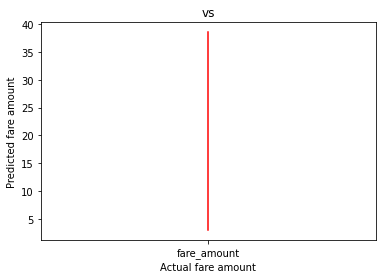

In [54]:
%matplotlib inline

plt.scatter(y_test,y_result,color = "black")

x0 = min(y_test)
x1 = max(y_test)
y0 = min(y_result)
y1 = max(y_result)
plt.plot([x0,x1],[y0,y1],color="red")

plt.xlabel("Actual fare amount")
plt.ylabel("Predicted fare amount")
plt.title("vs")
plt.show()

#  AIC 

In [57]:
import time
from sklearn.linear_model import LassoLarsIC
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, Y)
alpha_aic_ = model_aic.alpha_
alpha_aic_ 

0.0